# Let's build Linear Regression from Scratch

In [6]:
class OLS():
    
    def __init__(self, w_intercept=True):
        self.coeff_ = None
        self.intercept = w_intercept
        self.is_fit = False
        
    def add_intercept(self,X):
        """
        Adds an 'all 1's' bias term to function as the y-intercept
        """
        if type(X) == type(np.array([5])):
            rows = X.shape[0]
        else:
            X = np.array([[X]])
            rows = 1
        inter = np.ones(rows).reshape(-1,1)
        return np.hstack((X,inter))
        
    def fit(self, X, y):
        """
        Read in X (all features) and y (target) and use the Linear Algebra solution
        to extract the coefficients for Linear Regression.
        """
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1,1)
        if y.ndim == 1:
            y = y.reshape(-1,1)
        if self.intercept:
            X = self.add_intercept(X)
        temp_xtx = np.linalg.inv(np.dot(X.T,X))
        temp_xty = np.dot(X.T,y)
        self.coeff_ = np.dot(temp_xtx,temp_xty)
        self.is_fit = True
    
    def predict(self,X):
        """
        Takes in a new X value (that must be the same shape as the original X for fitting)
        and returns the predicted y value, using the coefficients from fitting.
        """
        if not self.is_fit:
            raise ValueError("You have to run the 'fit' method before using predict!")
        if type(X) == type([5]):
            X = np.array(X)
        if type(X) == type(5) or type(X) == type(5.):
            X = np.array([X])
        if X.ndim == 1:
            X = X.reshape(-1,1)
        if self.intercept:
            X = self.add_intercept(X)
        return np.dot(X,self.coeff_)[0][0]

In [7]:
def gen_data(coef=3.5, intercept=5., num_points=100):
    X = np.random.uniform(0,10,num_points)
    y = coef*X + np.random.normal(0,1.5,100) + intercept
    return X,y

X,y = gen_data()
lr = OLS(w_intercept=True)
lr.fit(X,y)
lr.coeff_

array([[ 3.44842828],
       [ 5.55358771]])

In [8]:
import seaborn as sns
model_vals = []
for val in np.linspace(0,10,100):
    model_vals.append(float(lr.predict(val)))

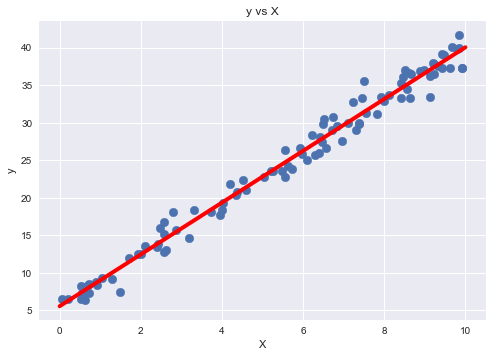

In [9]:
plt.scatter(X,y,s=75)
plt.plot(np.linspace(0,10,100),model_vals,'r-',lw=4)
plt.xlabel('X')
plt.ylabel('y')
plt.title("y vs X");

In [10]:
test_model_results(X, y, model_vals)

Mean Squared Error:  180.953218195
Root Mean Squared Error:  13.4518853026
Mean Absolute Error:  -1.89792251202
R2:  0.999969722696
Adj R2:  0.999969413744


## Let's see it in action with X^2

In [11]:
X = np.linspace(0,10,100)
y = 2.5*X*X + np.random.normal(0,1.5,100) + 5.

lr = OLS(w_intercept=True)
lr.fit(X*X,y)
lr.coeff_

array([[ 2.49416721],
       [ 5.26900864]])

In [12]:
lr.predict(0)

5.2690086392658202

In [13]:
import seaborn as sns
model_vals = []
for val in np.linspace(0,10,100):
    model_vals.append(float(lr.predict(val*val)))

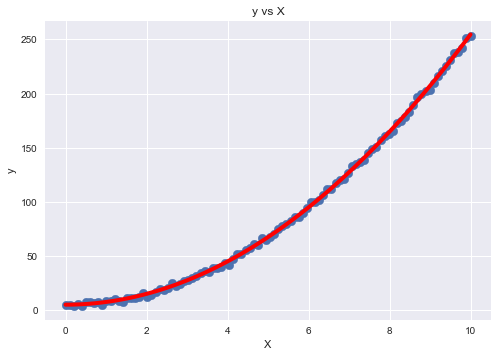

In [14]:
plt.scatter(X,y,s=75)
plt.plot(np.linspace(0,10,100),model_vals,'r-',lw=4)
plt.xlabel('X')
plt.ylabel('y')
plt.title("y vs X");

## Check Error handling for fit-predict

In [215]:
ols = OLS()
ols.predict([1])

ValueError: You have to run the 'fit' method before using predict!